# 1.この課題の目的
論文に触れ続ける一歩目を踏み出す
論文から有益な情報を引き出せるようにする
これまで扱ってきた領域の論文から新たな知識を得る
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った記述ができている。

# 2.論文読解
以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。

[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99

https://arxiv.org/pdf/1506.01497.pdf

## 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください。

## (1) 物体検出の分野にはどういった手法が存在したか。
### ◯SPPnet 
- 記載箇所：Abstract　２行目

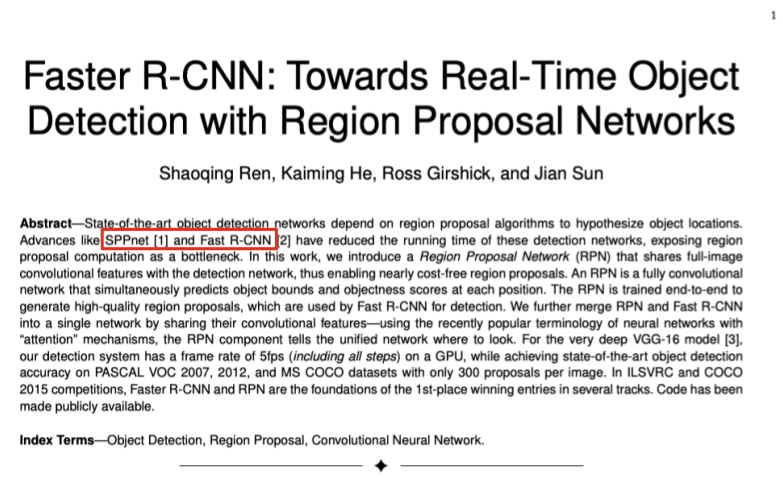

In [7]:
from IPython.display import Image, display
Image('Q1.png')

- 参考文献　SPPnetの論文　[Spatial Pyramid Pooling in Deep Convolutional　Networks for Visual Recognition](https://arxiv.org/pdf/1406.4729.pdf)

### 概要
- R-CNN(Region-based CNN)の予測に時間がかかるという問題を解決する為に開発された物体検出アルゴリズム
       
       
### R-CNNとの異なる点 「CNNでの特徴量抽出までのプロセス」
- R-CNN→画像全体でオブジェクト候補領域を検出し、各領域に対して crop と wrapを行ない正方形の画像データを作成し、CNNに投入する事で特徴量抽出を行なっている。またwrap 処理時は、画像の縦と横の比率を考慮せずに画像を正方形に変更している。問題点として「縦長の形をしたオブジェクトは変形してしまう問題が生じる」ことが考えられる。
       
- SPPnet→入力画像をそのままCNNに投入し、特徴抽出を行なってから、各候補領域に対して SPP(spatial pyramid pooling)層を介して固定長の特徴ベクトルに変換し、この特徴ベクトルを物体認識に使用する。
   
### ◯Fast R-CNN 
- 記載箇所：ABstract ２行目 上記画像を参照
- 参考文献　Fast R-CNNの論文 [Fast R-CNN](https://arxiv.org/pdf/1504.08083.pdf)

### 概要
- R-CNNを改良して実行時間の短縮を行なった物体検出アルゴリズム
       
### R-CNNとの異なる点 「物体領域候補からCNNにて特徴量抽出する際の計算方法」
- R-CNN→各物体領域候補の画像データをCNNに投入し計算を行う
- Fast R-CNN→画像全体の特徴量マップを使用しCNNの畳み込み計算を省略している
       
### どのようにして「CNNの畳み込み計算を省略」しているのか？
- 「(5)RoIプーリングとは何か」に記載。

## (2) Fasterとあるが、どういった仕組みで高速化したのか。
### ◯RPN(Region Proposal Network)の導入 
- 記載箇所：3.1 Region Proposal Networks
- 詳細は「(4)RPNとは何か」に記載

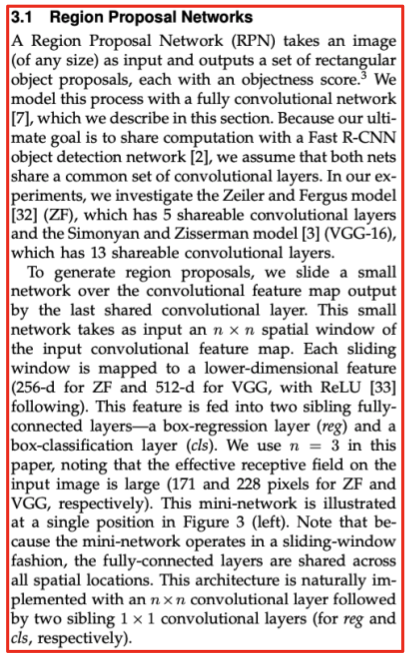

In [11]:
Image('Q2_1.png')

### ◯RoIプーリングの導入 記載箇所：3.1.2 Loss Function
- 詳細は「 (5) RoIプーリング」に記載

## (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

- 記載箇所　4.1 Experiments on PASCAL VOC

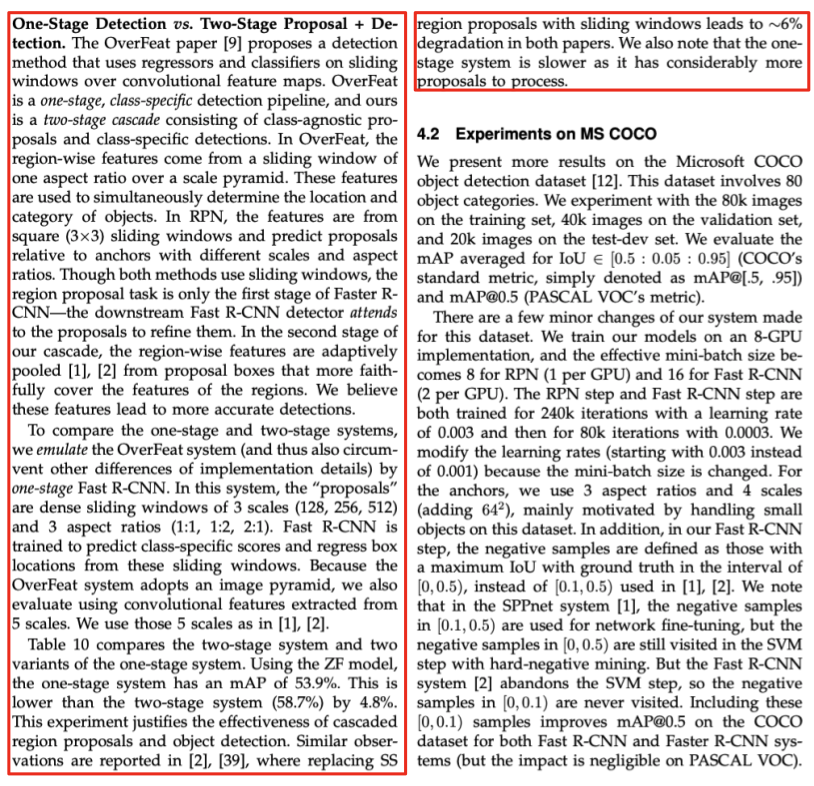

In [13]:
Image('Q3_1.png')

### 物体の領域の候補を検出するネットワーク(RPN)と領域候補のカテゴリを識別するネットワークの動作を「同時に行なっているか」 or「順次行なっているか」の違い

### One-Stage → 処理レイヤを1つにまとめ、領域抽出とカテゴリ識別を同時に実行している

### Two-Stage → それぞれの処理レイヤを直列に接続し、領域抽出後にカテゴリ識別を実行している

### 特徴
- One-Stageの方が実行速度が早い
- Two-Stageの方が精度が高い

## (4) RPNとは何か。
### 概要
   - Fast R-CNN の実行時間のボトルネックは、Selective Search(選択的探索法)を利用した物体領域候補(Region Proposal)の生成時間である。この時間を短縮する目的でFaster R-CNNではRegion Proposal Network(領域探索ネットワーク)が実装された。
   
### RPNの動作概要
- Fast R-CNNで使用されていたSelective Searchは、どのような入力画像についても同一のアルゴリズムで物体領域候補を生成していたが、RPNでは入力された画像をCNNに入力し、出力されたデータである特徴マップを使用し物体領域候補を生成する。
   
### RPNの動作詳細
- 特徴マップの局所領域毎に物体らしさのスコアが付与された複数のバウンディングボックスをRPNは提案する。このスコア付きバウンディングボックスを提案する為にバウンディングボックスのパラメータを予測する回帰ネットワーク、及び物体の有無を予測する分類ネットワークを２つのネットワークを統合する事でRPNの動作を実現している。
   
### 回帰ネットワークとAnchorBoxについて
   - 回帰ネットワークがバウンディングボックスのパラメータを最適化する動作を行うにあたり、あらかじめ形状が決められたAnchorBoxという入力画像の局所領域を中心としたバウンディングボックスを用いる。

## (5) RoIプーリングとは何か。
### 概要
   - Faster R-CNNのベースとなった「Fast R-CNN」から実装された処理層。実装された目的としてR-CNNの問題であった、物体領域候補をCNNに投入した際の畳み込み計算に時間がかかる問題に対しての対策を行う為に必要な処理層として追加された。
    
### RoIプーリング層が必要となった経緯
- 上記のR-CNNの問題への対策として、Fast R-CNNでは画像全体をCNNに投入し、得られた特徴量データを利用する事で物体領域候補での畳み込み演算を省略する事で実行時間の短縮を行なうという処理が実装された。
- この処理は具体的には「特徴量データをCNNの畳み込み層を通さずにAffine層(全結合層)にバイパスしてデータを投入する事」となる。しかし、この処理を行う場合は以下の問題点がある。→「Affine層は決まった次元のデータしか入力できないが、特徴量データの次元は画像データ毎に異なる為、そのまま特徴量データをAffine層に入力できない」
- この問題を解消する為、「特徴量データの次元数をAffine層で入力できる次元数に調整」が必要となり、この処理を行う層としてRoIプーリング層が実装された。
    
### RoIプーリング層の動作詳細
#### 例 8×8の単一特徴マップの1つの物体領域候補に対して2×2の出力サイズでRoIプーリングを実行した場合

   - 入力特徴量マップを用意

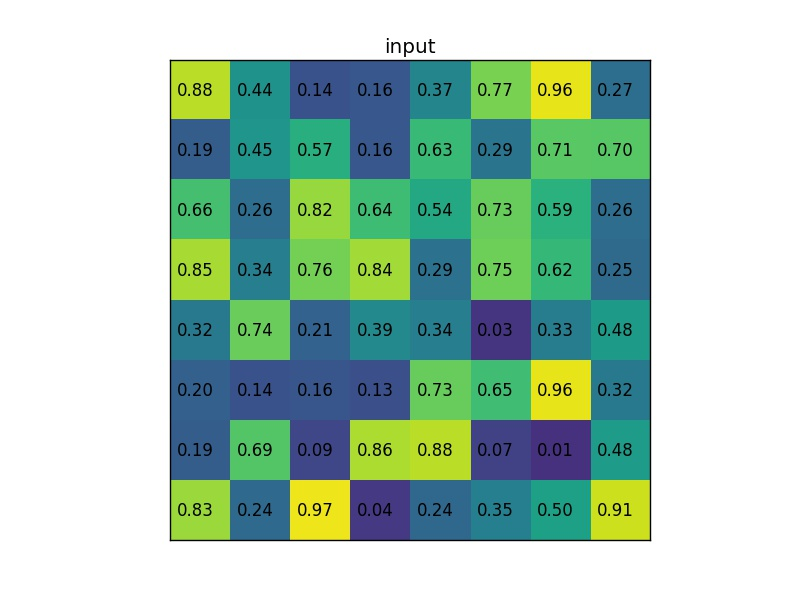

In [1]:
Image('step1.jpeg')

   - 入力特徴マップを全ての物体領域候補に対応させるように分割する

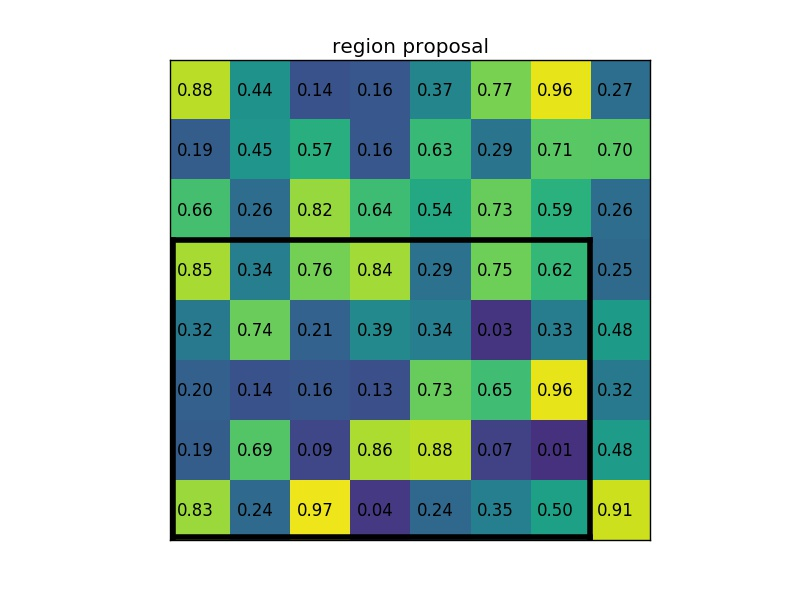

In [2]:
Image('step2.jpeg')

   - 出力サイズの2×2に分割する

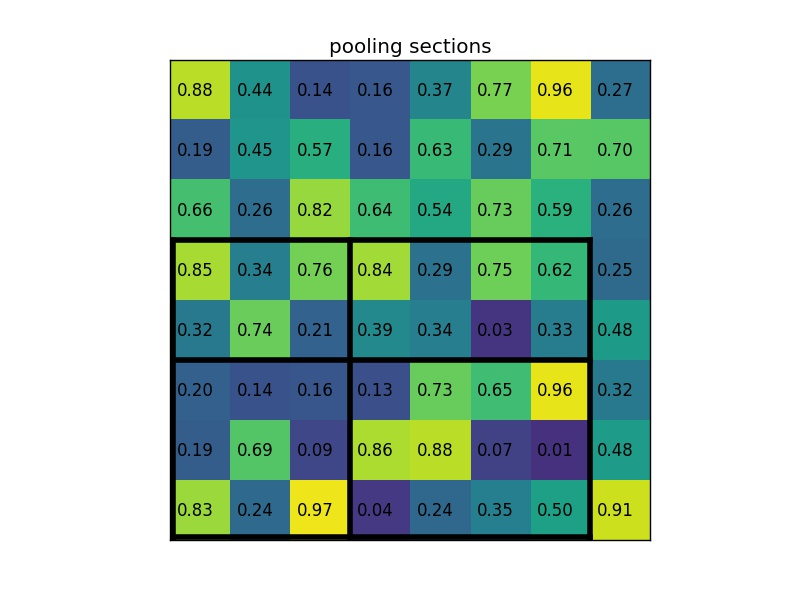

In [3]:
Image('step3.jpeg')

   - それぞれの分割毎の最大値を抽出する

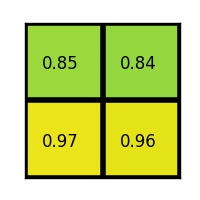

In [4]:
Image('step4.jpeg')

## (6) Anchorのサイズはどうするのが適切か
## →128×128 256×256 512×512の３種類のAnchorBoxを用いる時に最も評価値が高くなる
### 記載箇所　表8

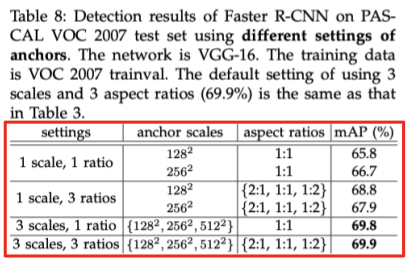

In [12]:
Image('Q6_1.png')

## (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。
## ◯データセットについて
### 記載箇所→4.1 Experiments on PASCAL VOC

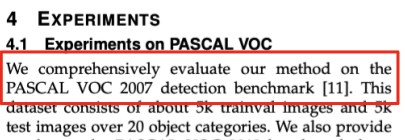

In [5]:
Image('Q7_1.png')

### 使用したデータセット→PASCAL VOC 2007
- オブジェクトカテゴリ 20

| 種類 | カテゴリ                                                                |
|------|-------------------------------------------------------------------------|
| 人   | 人                                                                      |
| 動物 | 鳥、猫、牛、犬、馬、羊                                                  |
| 車両 | 飛行機、自転車、ボート、バス、車、バイク、電車                          |
| 屋内 | ボトル、椅子、ダイニングテーブル、鉢植えの植物、ソファ、テレビ/モニター |



- 学習用データ　５万枚
- テスト用データ　5万枚

## ◯評価結果
## →SS , EB , のみのモデルと比較し評価値が論文で実装されたモデル(RPN+ZFNet、shared)が1.0程度、高くなった
### 記載箇所 4.1 Experiments on PASCAL VOC

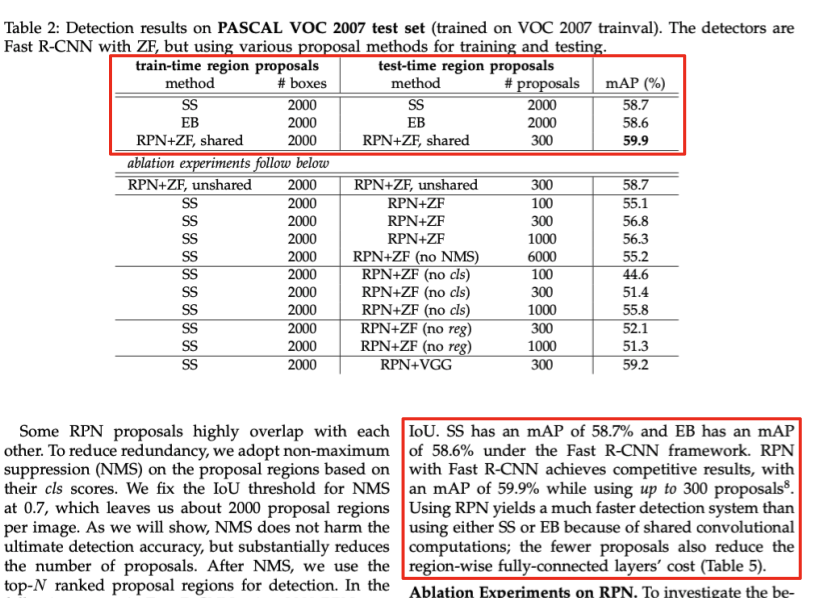

In [9]:
Image('Q7_2.png')

## 結果一覧

| 学習時に使用したモデル | 局所領域の数 | 予測時に使用したモデル | 物体領域候補の数 | 評価値(mean Average Precision)% |
|------------------------|------------------|------------------------|------------------|---------------------------------|
| SS                     | 2000             | SS                     | 2000             | 58.7                            |
| EB                     | 2000             | EB                     | 2000             | 58.6                            |
| RPN+ZF, shared        | 2000             | RPN+ZF                 | 300              | 59.9                            |

## 補足情報
### ZFnetについて
- 参考文献 ZFnetの論文 [Visualizing and understanding convolutional networks](https://arxiv.org/pdf/1311.2901.pdf)

### EBについて
- 参考文献 EB(EdgeBoxies)の論文 [Edge Boxes: Locating
Object Proposals from Edges](https://pdollar.github.io/files/papers/ZitnickDollarECCV14edgeBoxes.pdf)

## (8) （アドバンス）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。

## 条件
答える際は論文のどの部分からそれが分かるかを書く。
必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。
論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。